# Test PCA on soil Attributes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pca import pca


In [2]:
site_slga_data = pd.read_csv('../DATASETS/Soils_and_Landscape_Grid_of_Australia/Output/site_slga_data.csv', index_col = 0)

In [3]:
# Desired Columns: 
columns = [
 'CLY_000_005',
 'CLY_005_015',
 'CLY_015_030',
 'CLY_030_060',
 'CLY_060_100',
 'CLY_100_200',
 'DER_000_999',
 'NTO_000_005',
 'NTO_005_015',
 'NTO_015_030',
 'NTO_030_060',
 'NTO_060_100',
 'NTO_100_200',
 'PTO_000_005',
 'PTO_005_015',
 'PTO_015_030',
 'PTO_030_060',
 'PTO_060_100',
 'SLT_000_005',
 'SLT_005_015',
 'SLT_030_060',
 'SLT_060_100',
 'SLT_100_200',
 'pHc_000_005',
 'pHc_005_015',
 'pHc_015_030',
 'pHc_030_060',
 'pHc_060_100',
 'pHc_100_200']

site_slga_data = site_slga_data[columns]

In [4]:
site_slga_data = site_slga_data.dropna().copy()

In [5]:
site_slga_data.head()

CLY_000_005  CLY_005_015  CLY_015_030  CLY_030_060  CLY_060_100  \
NSABBS0001    15.750000    16.750000    19.750000    22.500000    22.750000   
NSABBS0002    16.250000    17.500000    22.250000    27.750000    27.250000   
NSABBS0003    10.000000    12.800000    15.000000    18.400000    24.200000   
NSABBS0004     8.833333    11.833333    13.666667    15.666667    21.333334   
NSABBS0005     9.833333    12.833333    15.000000    13.166667    20.166666   

            CLY_100_200  DER_000_999  NTO_000_005  NTO_005_015  NTO_015_030  \
NSABBS0001    28.750000     1.218544     0.170573     0.144308     0.110170   
NSABBS0002    35.750000     2.527381     0.171817     0.145643     0.107440   
NSABBS0003    25.400000    44.213760     0.102918     0.091805     0.076544   
NSABBS0004    24.000000    44.146587     0.098766     0.088101     0.071098   
NSABBS0005    23.166666    40.557777     0.099574     0.089124     0.074253   

            ...  SLT_005_015  SLT_030_060  SLT_060_100  SLT_100_200  \
NSABBS0001  ...    12.500000    12.250000    11.250000        13.00   
NSABBS0002  ...    13.000000    12.250000    11.250000        13.25   
NSABBS0003  ...     8.000000     8.000000     9.600000         9.60   
NSABBS0004  ...     7.833334     7.833334     9.000000         9.50   
NSABBS0005  ...     7.833334     7.666666     8.833333         9.00   

            pHc_000_005  pHc_005_015  pHc_015_030  pHc_030_060  pHc_060_100  \
NSABBS0001     5.911349     5.908731     6.090138     6.149799     6.305011   
NSABBS0002     5.641203     5.636680     5.807450     5.846457     6.019695   
NSABBS0003     5.743322     5.829330     6.072671     6.279499     6.439817   
NSABBS0004     5.822774     5.915548     6.172720     6.374738     6.526344   
NSABBS0005     5.784267     5.874176     6.133616     6.367352     6.542438   

            pHc_100_200  
NSABBS0001     6.503961  
NSABBS0002     6.224033  
NSABBS0003     6.459643  
NSABBS0004     6.539190  
NSABBS0005     6.567882  

[5 rows x 29 columns]

In [6]:
pca_1 = PCA(n_components = 10)

In [7]:
pca_1.fit(site_slga_data)

PCA(n_components=10)

In [8]:
print(pca_1.explained_variance_ratio_)

[6.56350107e-01 2.98098556e-01 1.80184590e-02 1.17475458e-02
 8.61350357e-03 2.73451986e-03 1.98476140e-03 1.04049054e-03
 5.44948621e-04 3.47237565e-04]


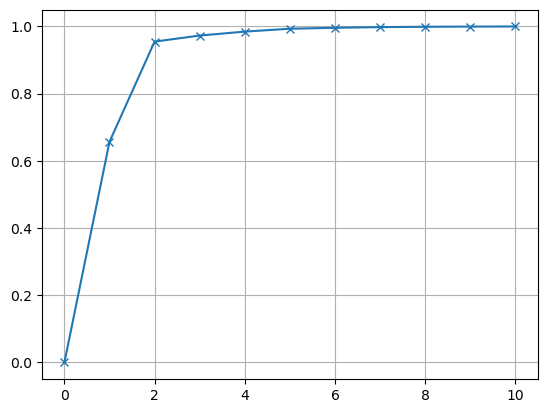

In [9]:
y = np.insert(np.cumsum(pca_1.explained_variance_ratio_), 0, 0)
x = [i for i in range(len(y))]
plt.plot(x, y, marker = 'x')
plt.grid(True)

In [10]:
#pca_1.get_covariance()

Check if using the standard scaler makes a difference:

In [11]:
site_slga_data_std = pd.DataFrame(StandardScaler().fit_transform(site_slga_data), columns = site_slga_data.columns)
pca_2 = PCA(n_components = 10)

In [12]:
pca_2.fit(site_slga_data_std)

PCA(n_components=10)

In [13]:
print(pca_2.explained_variance_ratio_)
print(np.cumsum(pca_2.explained_variance_ratio_))

[0.41857197 0.29873075 0.1254173  0.05311927 0.03357194 0.02608707
 0.01785409 0.00847778 0.00574753 0.00286261]
[0.41857197 0.71730271 0.84272002 0.89583929 0.92941123 0.95549829
 0.97335238 0.98183016 0.98757769 0.9904403 ]


In [14]:
y = np.insert(np.cumsum(pca_2.explained_variance_ratio_), 0, 0)
x = [i for i in range(len(y))]
plt.plot(x, y, marker = 'x')
plt.grid(True)

Without REG

In [15]:
DER_000_999 = site_slga_data['DER_000_999'].values
#DER_000_999

In [16]:
site_slga_data['DER_000_999']

NSABBS0001      1.218544
NSABBS0002      2.527381
NSABBS0003     44.213760
NSABBS0004     44.146587
NSABBS0005     40.557777
                 ...    
WAGCOO0001      9.971666
WAGCOO0002     12.241350
WAGCOO0004     16.202600
QDASEQ0001      6.972290
SASMDD0013    178.159990
Name: DER_000_999, Length: 735, dtype: float64

In [17]:
site_slga_data_reduced =  site_slga_data.drop(columns = ['DER_000_999']).copy()

In [18]:
site_slga_data_reduced.head()

CLY_000_005  CLY_005_015  CLY_015_030  CLY_030_060  CLY_060_100  \
NSABBS0001    15.750000    16.750000    19.750000    22.500000    22.750000   
NSABBS0002    16.250000    17.500000    22.250000    27.750000    27.250000   
NSABBS0003    10.000000    12.800000    15.000000    18.400000    24.200000   
NSABBS0004     8.833333    11.833333    13.666667    15.666667    21.333334   
NSABBS0005     9.833333    12.833333    15.000000    13.166667    20.166666   

            CLY_100_200  NTO_000_005  NTO_005_015  NTO_015_030  NTO_030_060  \
NSABBS0001    28.750000     0.170573     0.144308     0.110170     0.070957   
NSABBS0002    35.750000     0.171817     0.145643     0.107440     0.069151   
NSABBS0003    25.400000     0.102918     0.091805     0.076544     0.055215   
NSABBS0004    24.000000     0.098766     0.088101     0.071098     0.051321   
NSABBS0005    23.166666     0.099574     0.089124     0.074253     0.054384   

            ...  SLT_005_015  SLT_030_060  SLT_060_100  SLT_100_200  \
NSABBS0001  ...    12.500000    12.250000    11.250000        13.00   
NSABBS0002  ...    13.000000    12.250000    11.250000        13.25   
NSABBS0003  ...     8.000000     8.000000     9.600000         9.60   
NSABBS0004  ...     7.833334     7.833334     9.000000         9.50   
NSABBS0005  ...     7.833334     7.666666     8.833333         9.00   

            pHc_000_005  pHc_005_015  pHc_015_030  pHc_030_060  pHc_060_100  \
NSABBS0001     5.911349     5.908731     6.090138     6.149799     6.305011   
NSABBS0002     5.641203     5.636680     5.807450     5.846457     6.019695   
NSABBS0003     5.743322     5.829330     6.072671     6.279499     6.439817   
NSABBS0004     5.822774     5.915548     6.172720     6.374738     6.526344   
NSABBS0005     5.784267     5.874176     6.133616     6.367352     6.542438   

            pHc_100_200  
NSABBS0001     6.503961  
NSABBS0002     6.224033  
NSABBS0003     6.459643  
NSABBS0004     6.539190  
NSABBS0005     6.567882  

[5 rows x 28 columns]

In [19]:
site_slga_data_red_std = pd.DataFrame(StandardScaler().fit_transform(site_slga_data_reduced), columns = site_slga_data_reduced.columns, index = site_slga_data_reduced.index)

In [20]:
site_slga_data_red_std.head()

CLY_000_005  CLY_005_015  CLY_015_030  CLY_030_060  CLY_060_100  \
NSABBS0001     0.165509     0.122177     0.130232     0.096161    -0.055499   
NSABBS0002     0.226125     0.208178     0.393748     0.621893     0.408008   
NSABBS0003    -0.531579    -0.330765    -0.370448    -0.314412     0.093853   
NSABBS0004    -0.673018    -0.441611    -0.510989    -0.588126    -0.201418   
NSABBS0005    -0.551785    -0.326942    -0.370448    -0.838475    -0.321587   

            CLY_100_200  NTO_000_005  NTO_005_015  NTO_015_030  NTO_030_060  \
NSABBS0001     0.359017     1.274712     1.337713     1.926623     1.897406   
NSABBS0002     1.096579     1.291739     1.360879     1.843703     1.805376   
NSABBS0003     0.006041     0.348684     0.426474     0.905231     1.095401   
NSABBS0004    -0.141471     0.291849     0.362203     0.739811     0.896997   
NSABBS0005    -0.229276     0.302911     0.379954     0.835628     1.053055   

            ...  SLT_005_015  SLT_030_060  SLT_060_100  SLT_100_200  \
NSABBS0001  ...     1.029293     0.695323     0.258635     1.818561   
NSABBS0002  ...     1.168014     0.695323     0.258635     1.935063   
NSABBS0003  ...    -0.219188    -0.494656    -0.191767     0.234146   
NSABBS0004  ...    -0.265428    -0.541321    -0.355550     0.187545   
NSABBS0005  ...    -0.265428    -0.587987    -0.401045    -0.045457   

            pHc_000_005  pHc_005_015  pHc_015_030  pHc_030_060  pHc_060_100  \
NSABBS0001     0.102933     0.054861     0.110691    -0.028923    -0.064717   
NSABBS0002    -0.239942    -0.277507    -0.218387    -0.364639    -0.376343   
NSABBS0003    -0.110331    -0.042145     0.090357     0.114619     0.082520   
NSABBS0004    -0.009488     0.063190     0.206824     0.220022     0.177027   
NSABBS0005    -0.058362     0.012645     0.161304     0.211848     0.194605   

            pHc_100_200  
NSABBS0001    -0.000201  
NSABBS0002    -0.301852  
NSABBS0003    -0.047957  
NSABBS0004     0.037763  
NSABBS0005     0.068681  

[5 rows x 28 columns]

In [21]:
pca_red = PCA(n_components = 10)
pca_red.fit(site_slga_data_red_std)

PCA(n_components=10)

In [22]:
print(pca_red.explained_variance_ratio_)
print(np.cumsum(pca_red.explained_variance_ratio_))

[0.43276737 0.30608383 0.12504791 0.05501117 0.03466113 0.01849781
 0.00879818 0.00597461 0.00296622 0.00254071]
[0.43276737 0.7388512  0.86389911 0.91891028 0.9535714  0.97206921
 0.98086739 0.986842   0.98980822 0.99234894]


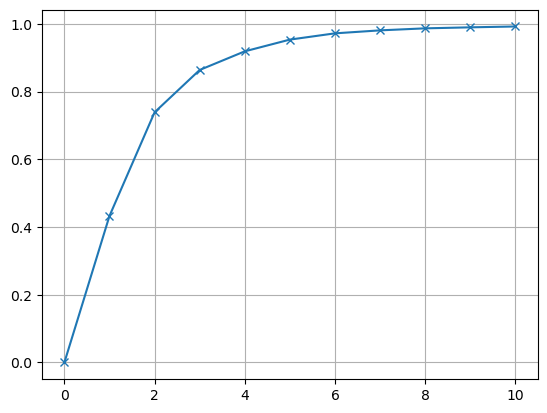

In [23]:
y = np.insert(np.cumsum(pca_red.explained_variance_ratio_), 0, 0)
x = [i for i in range(len(y))]
plt.plot(x, y, marker = 'x')
plt.grid(True)

In [24]:
pca_red = PCA(n_components = 3)
projected_SLGA = pca_red.fit_transform(site_slga_data_red_std)
SLGA_PCA_Processed = pd.DataFrame(projected_SLGA, columns = ['SLGA_1', 'SLGA_2', 'SLGA_3'], index = site_slga_data_red_std.index)

In [25]:
SLGA_PCA_Processed.head()

SLGA_1    SLGA_2    SLGA_3
NSABBS0001  4.833957  1.698315  1.965673
NSABBS0002  4.868380  1.512510  0.628439
NSABBS0003  0.430347  1.507223  0.999127
NSABBS0004  0.144582  1.477305  1.403115
NSABBS0005  0.040310  1.638259  1.431048

In [26]:
SLGA_PCA_Processed_Export = SLGA_PCA_Processed.copy()
SLGA_PCA_Processed_Export['DER_000_999'] = DER_000_999
SLGA_PCA_Processed_Export.to_csv('../DATASETS/Soils_and_Landscape_Grid_of_Australia/Output/SGLA_PCA_3.csv')

In [27]:
SLGA_PCA_Processed_Export.head()

SLGA_1    SLGA_2    SLGA_3  DER_000_999
NSABBS0001  4.833957  1.698315  1.965673     1.218544
NSABBS0002  4.868380  1.512510  0.628439     2.527381
NSABBS0003  0.430347  1.507223  0.999127    44.213760
NSABBS0004  0.144582  1.477305  1.403115    44.146587
NSABBS0005  0.040310  1.638259  1.431048    40.557777

In [28]:
SLGA_PCA_Processed.plot.scatter(x = 'SLGA_1', y = 'SLGA_2')

<Axes: xlabel='SLGA_1', ylabel='SLGA_2'>

In [29]:
SLGA_PCA_Processed.plot.scatter(x = 'SLGA_2', y = 'SLGA_3')

<Axes: xlabel='SLGA_2', ylabel='SLGA_3'>

In [30]:
SLGA_PCA_Processed.plot.scatter(x = 'SLGA_1', y = 'SLGA_3')

<Axes: xlabel='SLGA_1', ylabel='SLGA_3'>

In [31]:
SLGA_PCA_Processed_reversed = pd.DataFrame(pca_red.inverse_transform(SLGA_PCA_Processed), columns = site_slga_data_red_std.columns, index = site_slga_data_red_std.index)
SLGA_PCA_Processed_reversed.head()

CLY_000_005  CLY_005_015  CLY_015_030  CLY_030_060  CLY_060_100  \
NSABBS0001          NaN          NaN          NaN          NaN          NaN   
NSABBS0002          NaN          NaN          NaN          NaN          NaN   
NSABBS0003          NaN          NaN          NaN          NaN          NaN   
NSABBS0004          NaN          NaN          NaN          NaN          NaN   
NSABBS0005          NaN          NaN          NaN          NaN          NaN   

            CLY_100_200  NTO_000_005  NTO_005_015  NTO_015_030  NTO_030_060  \
NSABBS0001          NaN          NaN          NaN          NaN          NaN   
NSABBS0002          NaN          NaN          NaN          NaN          NaN   
NSABBS0003          NaN          NaN          NaN          NaN          NaN   
NSABBS0004          NaN          NaN          NaN          NaN          NaN   
NSABBS0005          NaN          NaN          NaN          NaN          NaN   

            ...  SLT_005_015  SLT_030_060  SLT_060_100  SLT_100_200  \
NSABBS0001  ...          NaN          NaN          NaN          NaN   
NSABBS0002  ...          NaN          NaN          NaN          NaN   
NSABBS0003  ...          NaN          NaN          NaN          NaN   
NSABBS0004  ...          NaN          NaN          NaN          NaN   
NSABBS0005  ...          NaN          NaN          NaN          NaN   

            pHc_000_005  pHc_005_015  pHc_015_030  pHc_030_060  pHc_060_100  \
NSABBS0001          NaN          NaN          NaN          NaN          NaN   
NSABBS0002          NaN          NaN          NaN          NaN          NaN   
NSABBS0003          NaN          NaN          NaN          NaN          NaN   
NSABBS0004          NaN          NaN          NaN          NaN          NaN   
NSABBS0005          NaN          NaN          NaN          NaN          NaN   

            pHc_100_200  
NSABBS0001          NaN  
NSABBS0002          NaN  
NSABBS0003          NaN  
NSABBS0004          NaN  
NSABBS0005          NaN  

[5 rows x 28 columns]

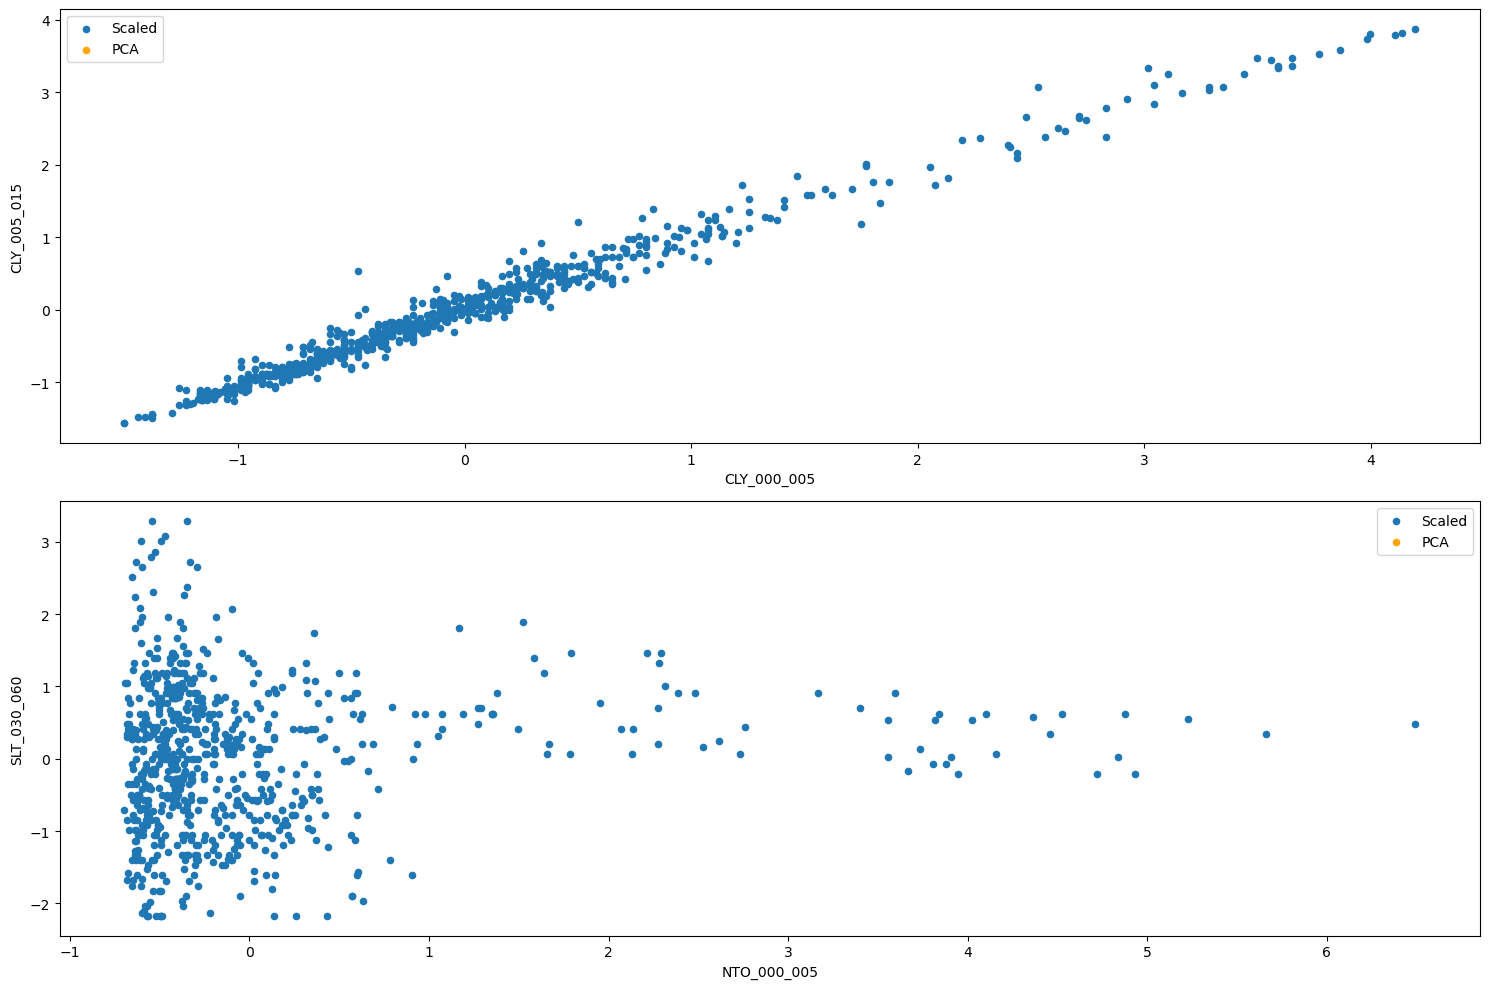

In [32]:
fig, ax = plt.subplots(2, 1, figsize = (15,10))

site_slga_data_red_std.plot.scatter(x ='CLY_000_005', y = 'CLY_005_015', ax = ax[0], label = 'Scaled')
SLGA_PCA_Processed_reversed.plot.scatter(x ='CLY_000_005',y = 'CLY_005_015', ax = ax[0], color = 'orange', label = 'PCA')

site_slga_data_red_std.plot.scatter(x ='NTO_000_005', y = 'SLT_030_060', ax = ax[1], label = 'Scaled')
SLGA_PCA_Processed_reversed.plot.scatter(x ='NTO_000_005',y = 'SLT_030_060', ax = ax[1], color = 'orange', label = 'PCA')
fig.tight_layout()


In [33]:
component_importances = pd.DataFrame(np.abs(pca_red.components_), columns = site_slga_data_red_std.columns, index = [1,2,3])

In [34]:
component_importances.head()

CLY_000_005  CLY_005_015  CLY_015_030  CLY_030_060  CLY_060_100  \
1     0.201898     0.204957     0.210715     0.219611     0.221021   
2     0.184178     0.184195     0.181971     0.150292     0.119773   
3     0.120021     0.125508     0.138345     0.164374     0.163512   

   CLY_100_200  NTO_000_005  NTO_005_015  NTO_015_030  NTO_030_060  ...  \
1     0.202699     0.193586     0.196694     0.204651     0.205369  ...   
2     0.148209     0.203815     0.202044     0.194428     0.187365  ...   
3     0.162533     0.137499     0.144494     0.156008     0.166097  ...   

   SLT_005_015  SLT_030_060  SLT_060_100  SLT_100_200  pHc_000_005  \
1     0.214014     0.195358     0.187089     0.206542     0.040808   
2     0.166400     0.185677     0.182976     0.111842     0.279799   
3     0.129461     0.141250     0.125086     0.176075     0.284631   

   pHc_005_015  pHc_015_030  pHc_030_060  pHc_060_100  pHc_100_200  
1     0.042779     0.044608     0.047462     0.052353     0.060328  
2     0.281364     0.283177     0.283701     0.284292     0.286839  
3     0.282022     0.278367     0.275446     0.269198     0.253193  

[3 rows x 28 columns]

In [35]:
fig, ax = plt.subplots(1,3, figsize = (20,5), sharex = True)
for i in range(1, len(component_importances) + 1):
    principal_importances = component_importances.iloc[i - 1,].sort_values(ascending = False)
    principal_importances.plot.bar(ax = ax[i - 1], ylim = (0, 1), title = f'Principal Component {i} ({round(pca_red.explained_variance_ratio_[i-1],2)*100}%)')
    ax[i-1].grid(True)

In [36]:
len(component_importances)

3

In [37]:
model = pca()
results = model.fit_transform(site_slga_data_red_std)
model.plot()

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [28] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [28] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 5 Principal Components explain [97.20%] of the variance.'}, xlabel='Principal Component', ylabel='Percentage explained variance'>)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [97.20%] of the variance'}, xlabel='PC1 (43.2% expl.var)', ylabel='PC2 (30.6% expl.var)'>)

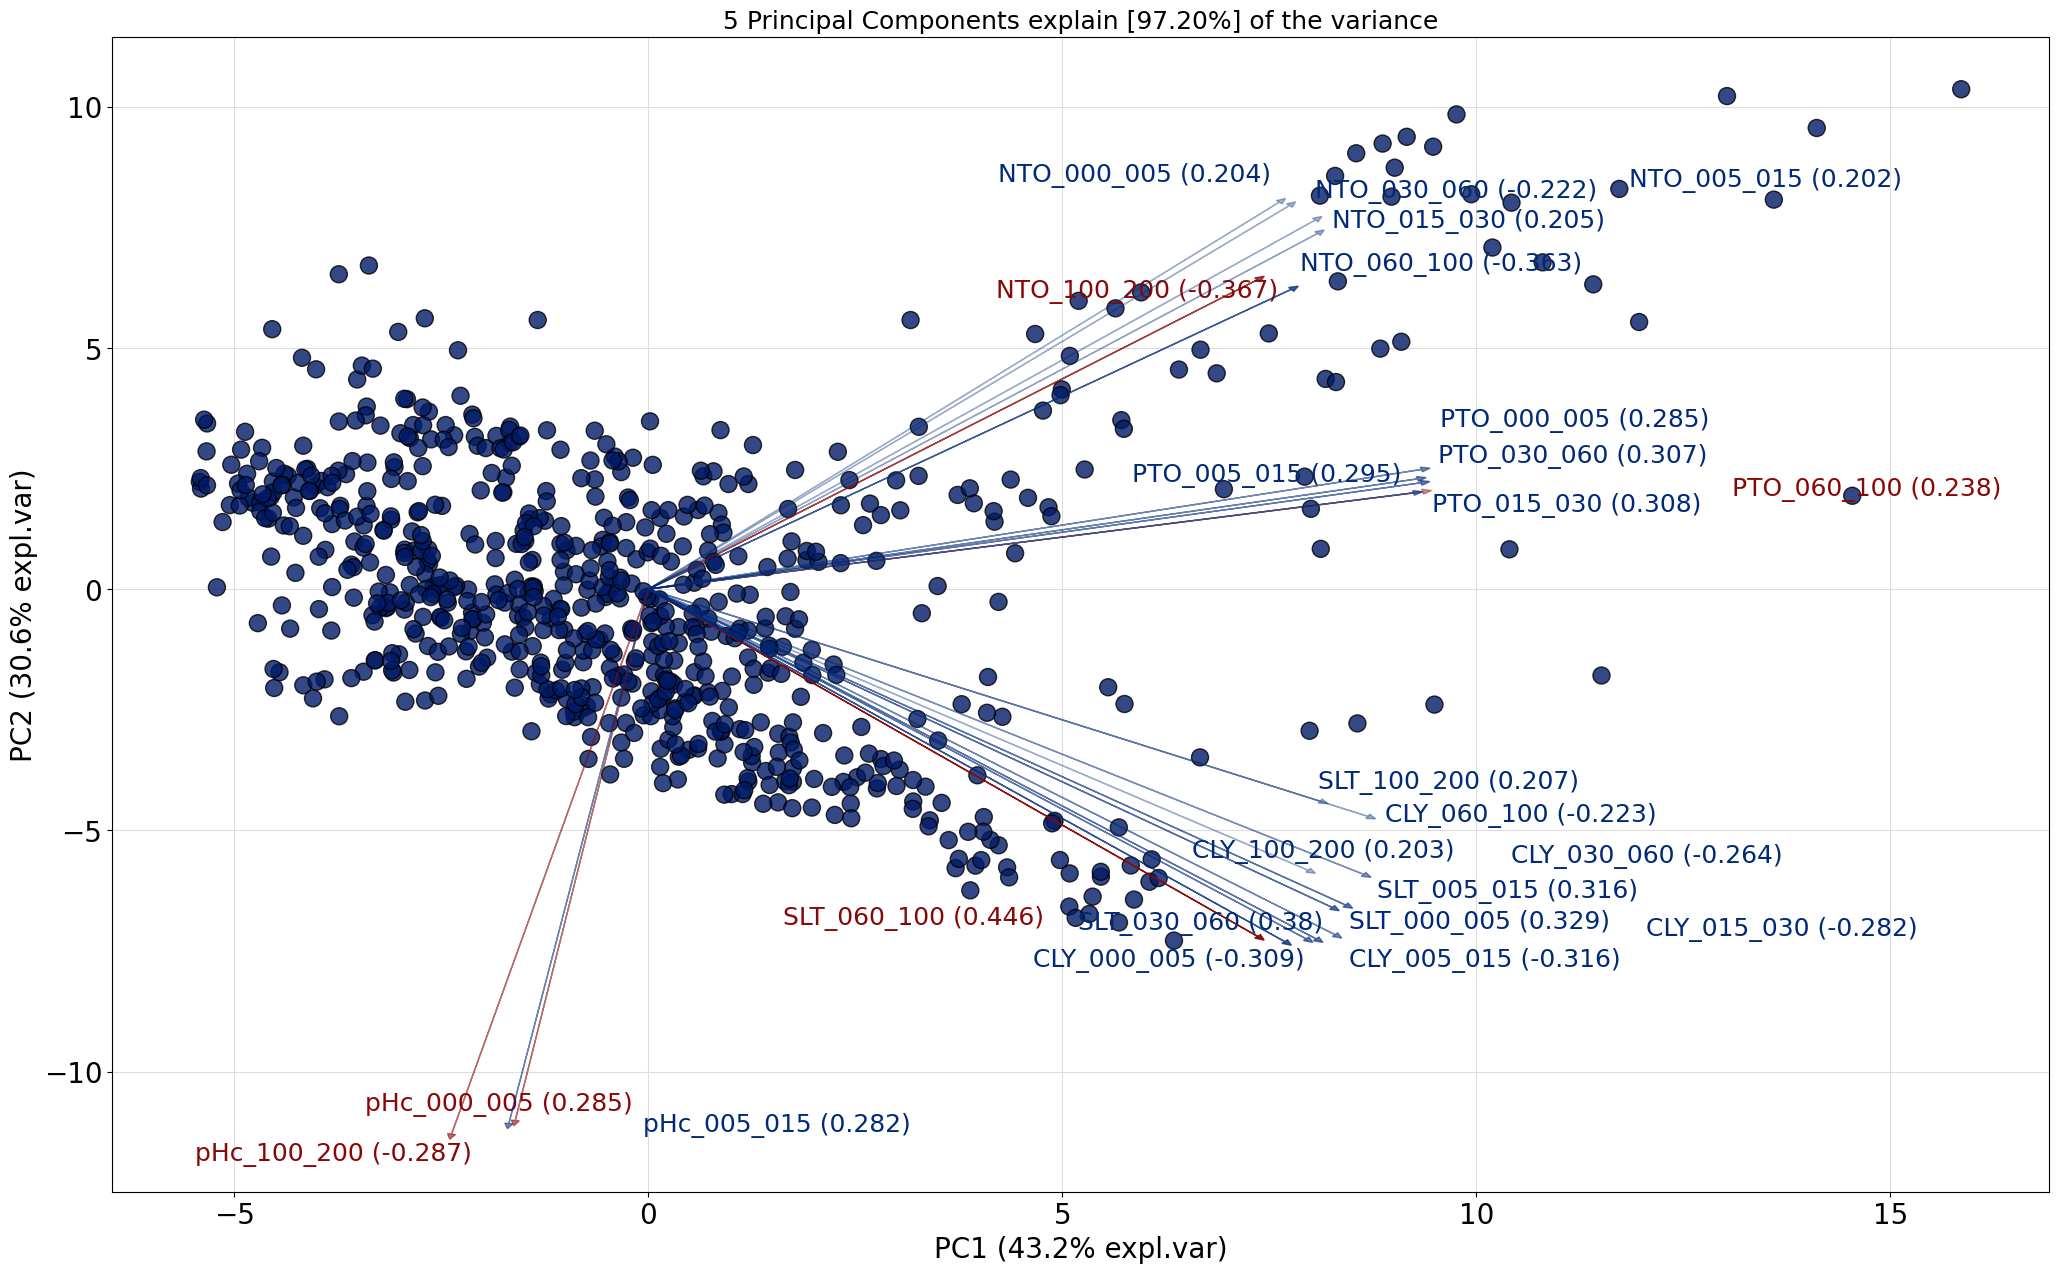

In [38]:
model.biplot()

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC2 vs PC3 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [97.20%] of the variance'}, xlabel='PC2 (30.6% expl.var)', ylabel='PC3 (12.5% expl.var)'>)

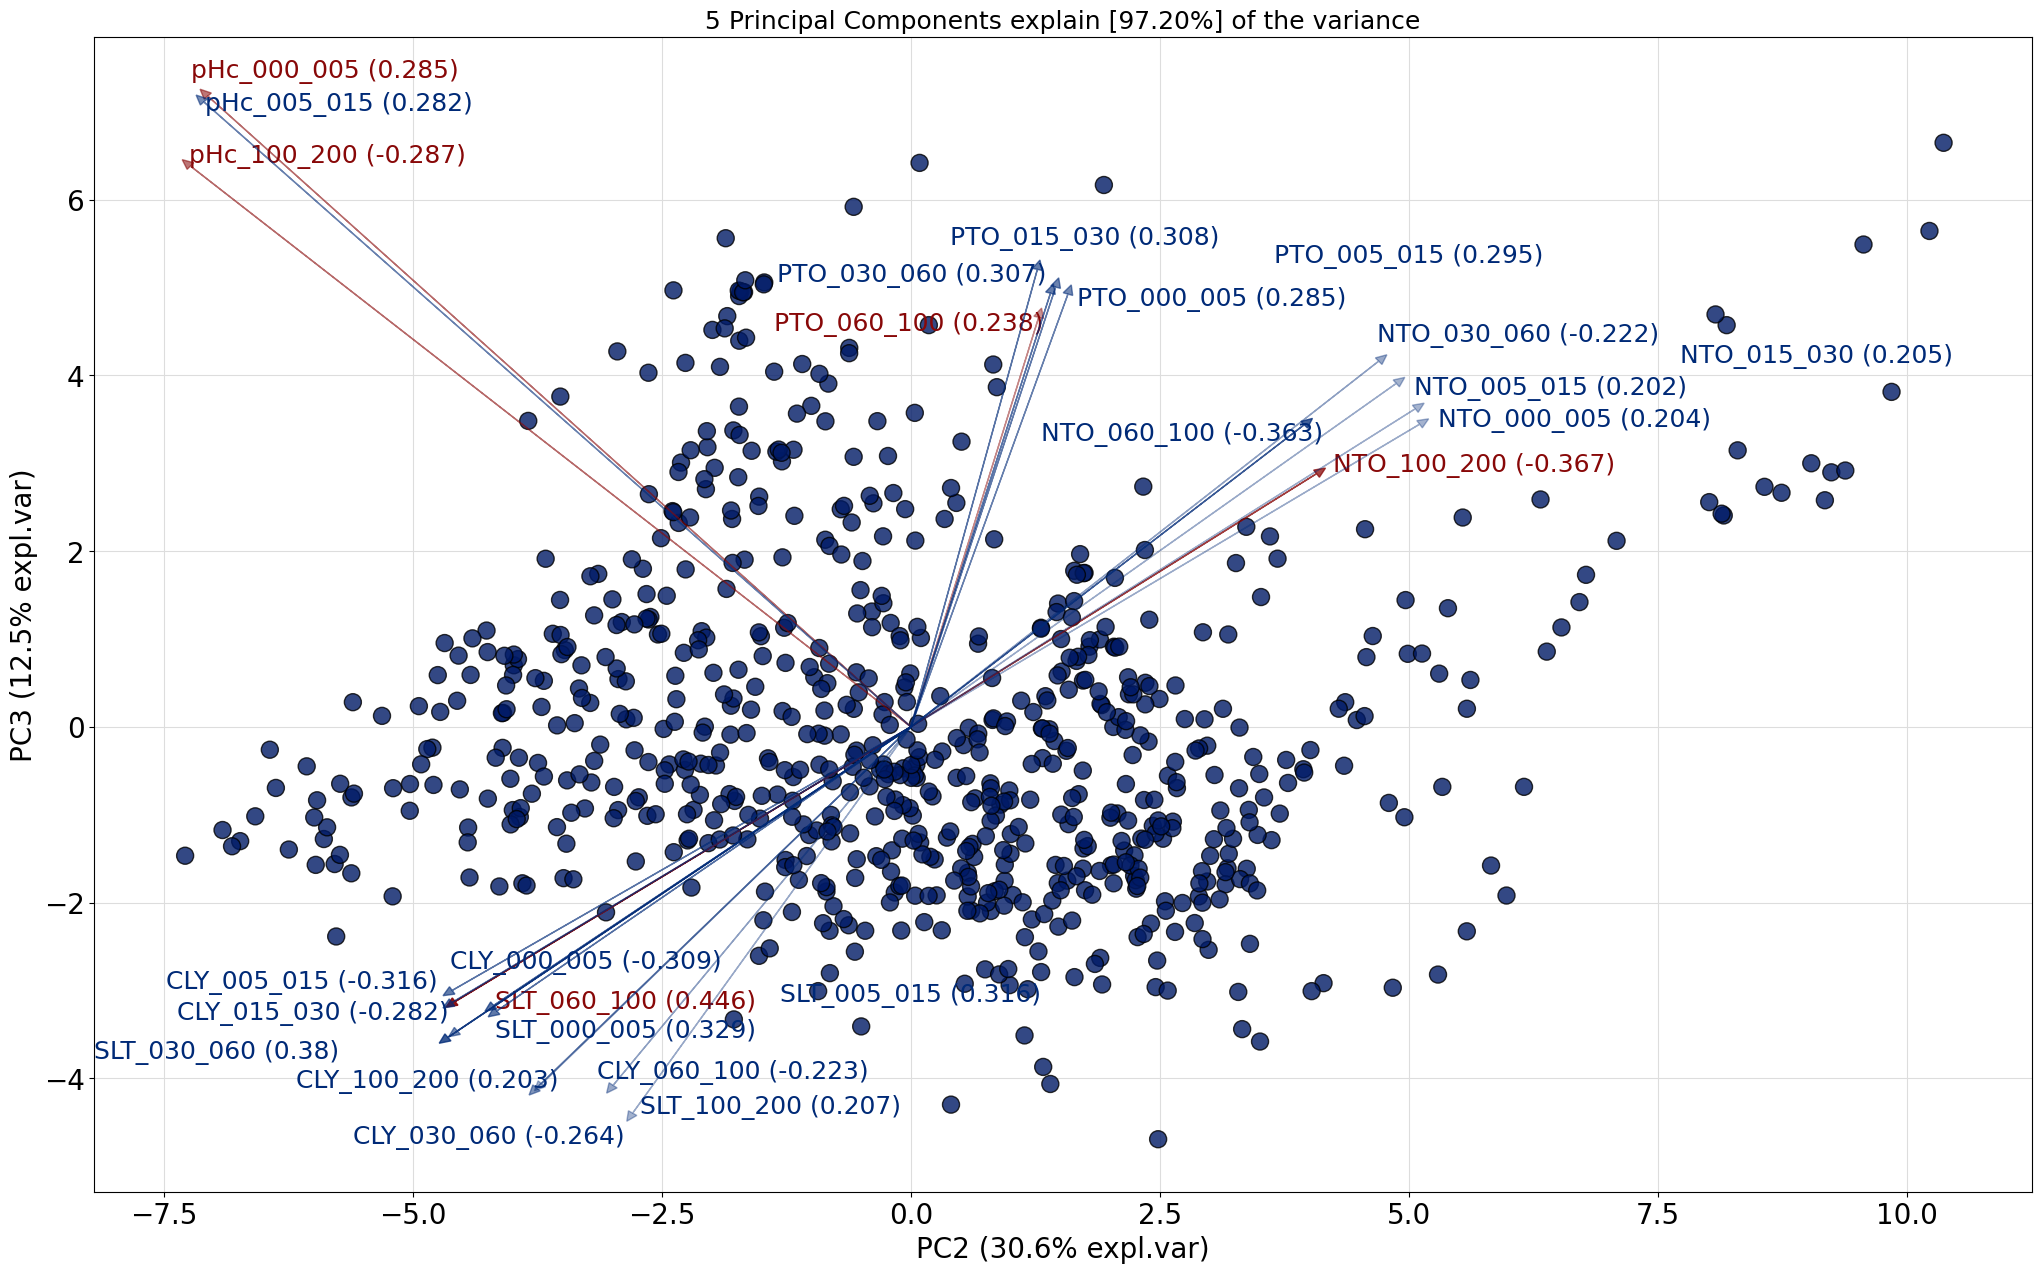

In [39]:
model.biplot(PC = [1,2])

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC3 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [97.20%] of the variance'}, xlabel='PC1 (43.2% expl.var)', ylabel='PC3 (12.5% expl.var)'>)

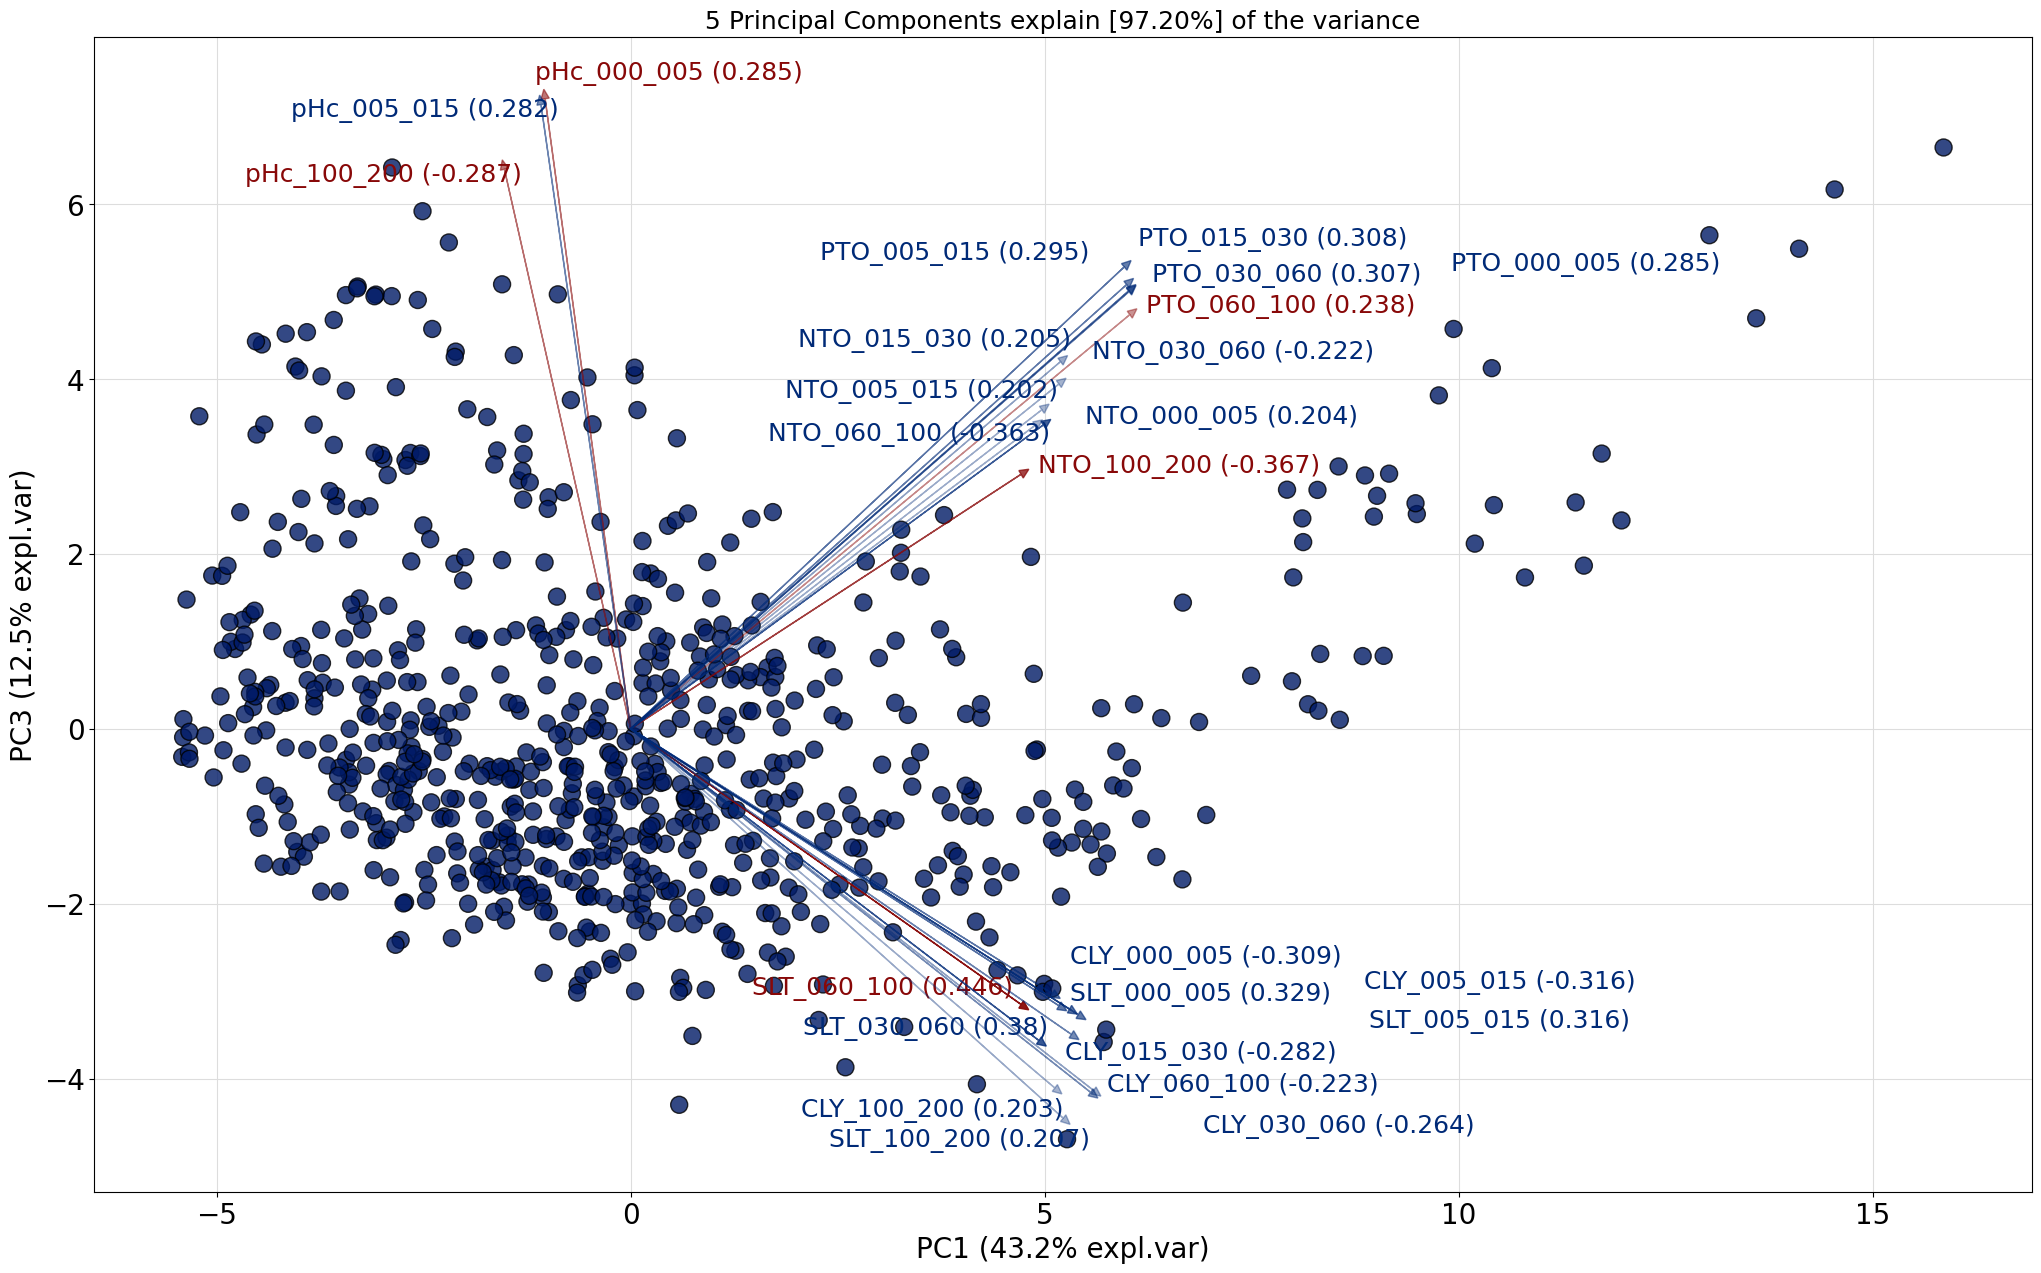

In [40]:
model.biplot(PC = [0,2])

In [41]:
print(model.results['topfeat'])

     PC      feature   loading  type
0   PC1  PTO_060_100  0.237953  best
1   PC2  pHc_100_200 -0.286839  best
2   PC3  pHc_000_005  0.284631  best
3   PC4  NTO_100_200 -0.366809  best
4   PC5  SLT_060_100  0.445698  best
5   PC5  CLY_000_005 -0.308514  weak
6   PC5  CLY_005_015 -0.315824  weak
7   PC5  CLY_015_030 -0.281892  weak
8   PC5  CLY_030_060 -0.263813  weak
9   PC5  CLY_060_100 -0.222515  weak
10  PC1  CLY_100_200  0.202699  weak
11  PC2  NTO_000_005  0.203815  weak
12  PC2  NTO_005_015  0.202044  weak
13  PC1  NTO_015_030  0.204651  weak
14  PC4  NTO_030_060 -0.222360  weak
15  PC4  NTO_060_100 -0.362968  weak
16  PC4  PTO_000_005  0.284910  weak
17  PC4  PTO_005_015  0.295450  weak
18  PC4  PTO_015_030  0.307818  weak
19  PC4  PTO_030_060  0.306613  weak
20  PC5  SLT_000_005  0.328664  weak
21  PC5  SLT_005_015  0.315864  weak
22  PC5  SLT_030_060  0.379670  weak
23  PC1  SLT_100_200  0.206542  weak
24  PC3  pHc_005_015  0.282022  weak
25  PC2  pHc_015_030 -0.283177  weak
2

[scatterd] >INFO> Add density layer


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [97.20%] of the variance'}, xlabel='PC1 (43.2% expl.var)', ylabel='PC2 (30.6% expl.var)'>)

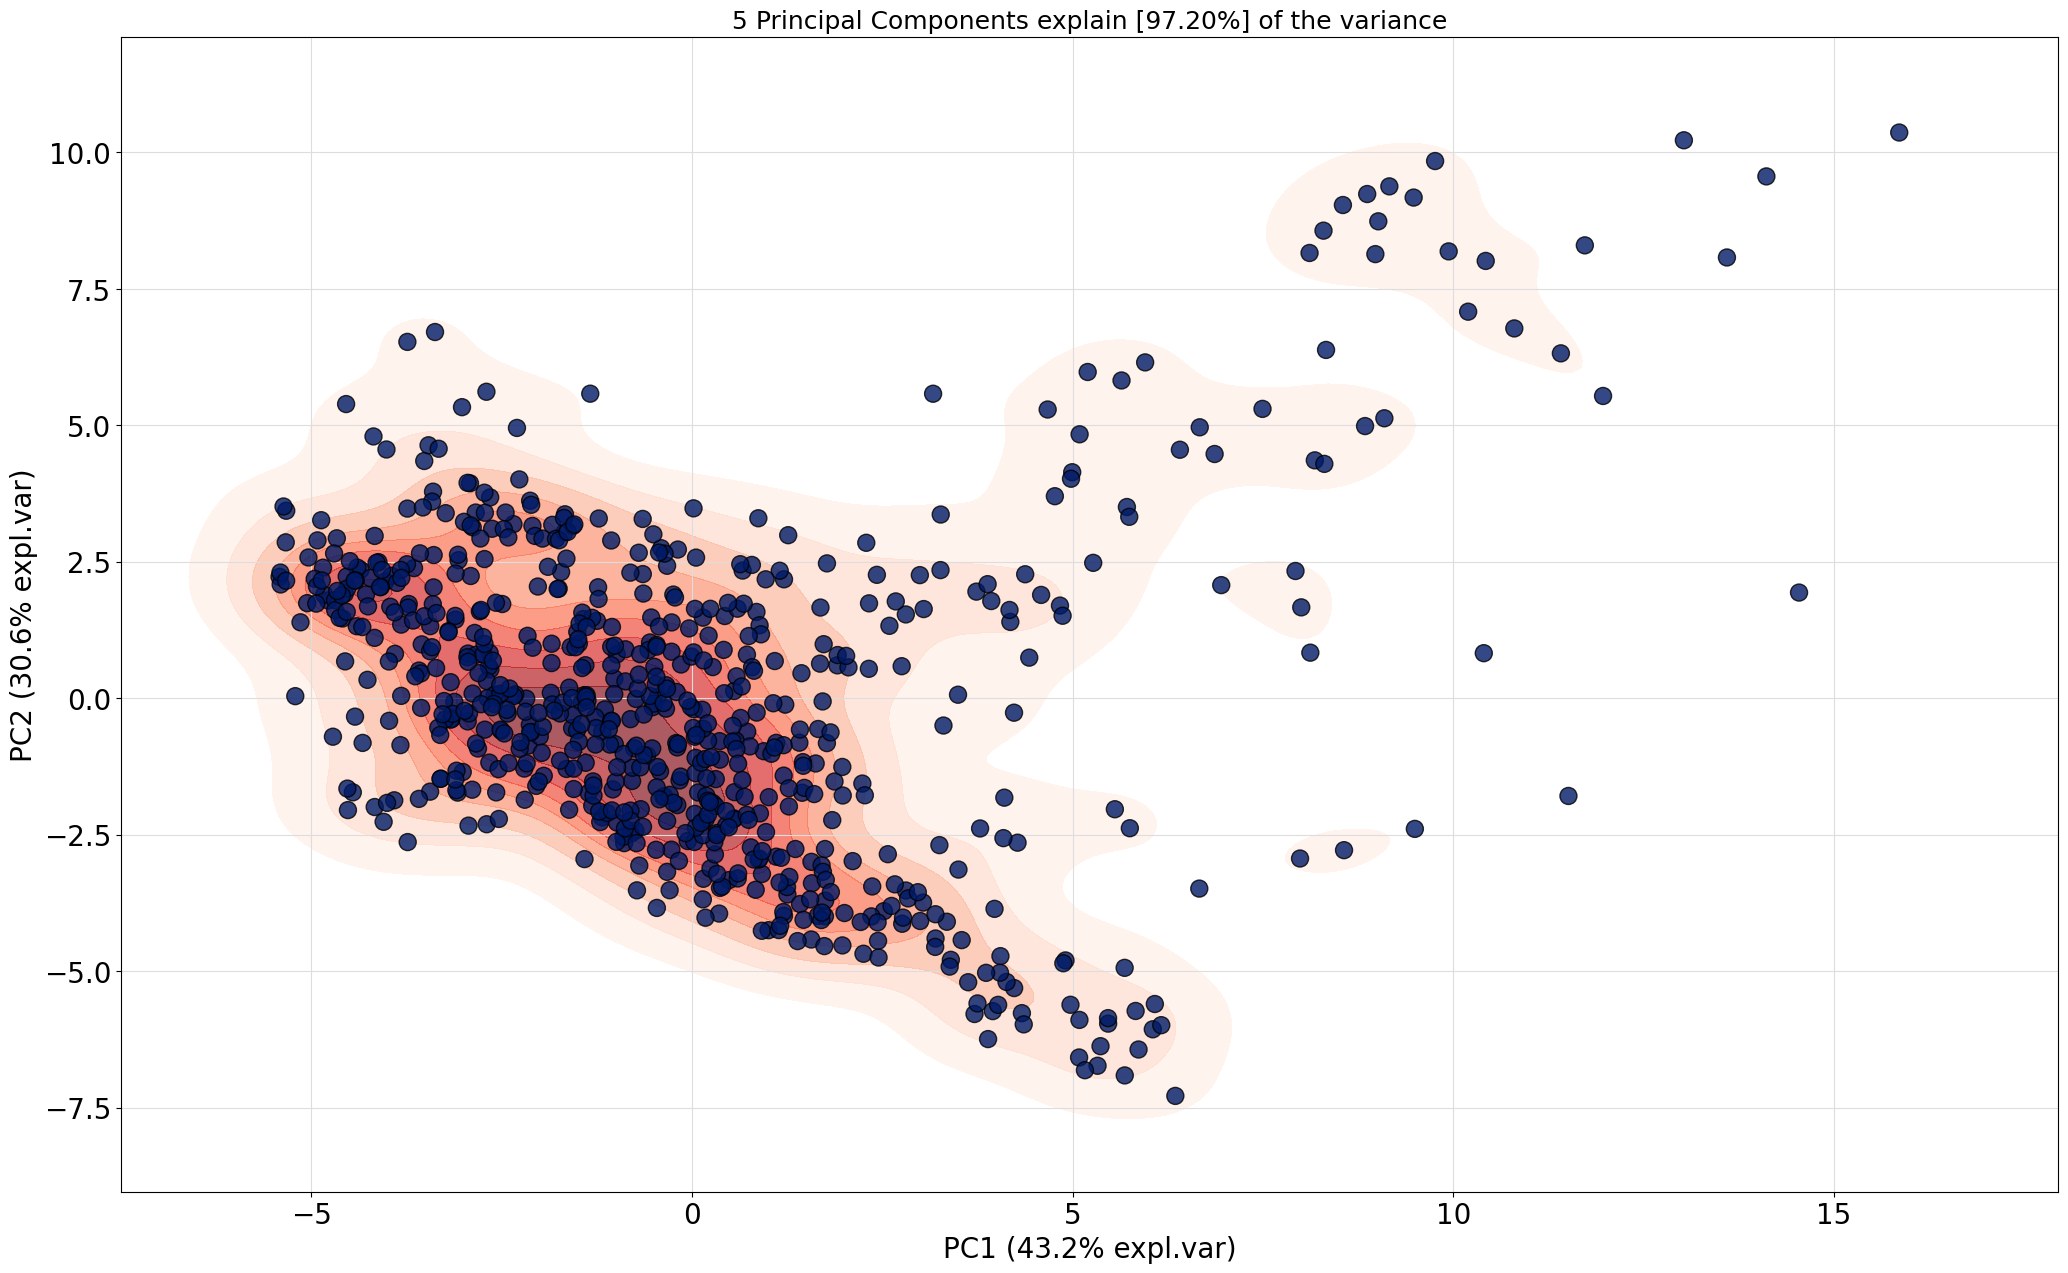

In [42]:
model.scatter(density=True)

[scatterd] >INFO> Add density layer


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [97.20%] of the variance'}, xlabel='PC2 (30.6% expl.var)', ylabel='PC3 (12.5% expl.var)'>)

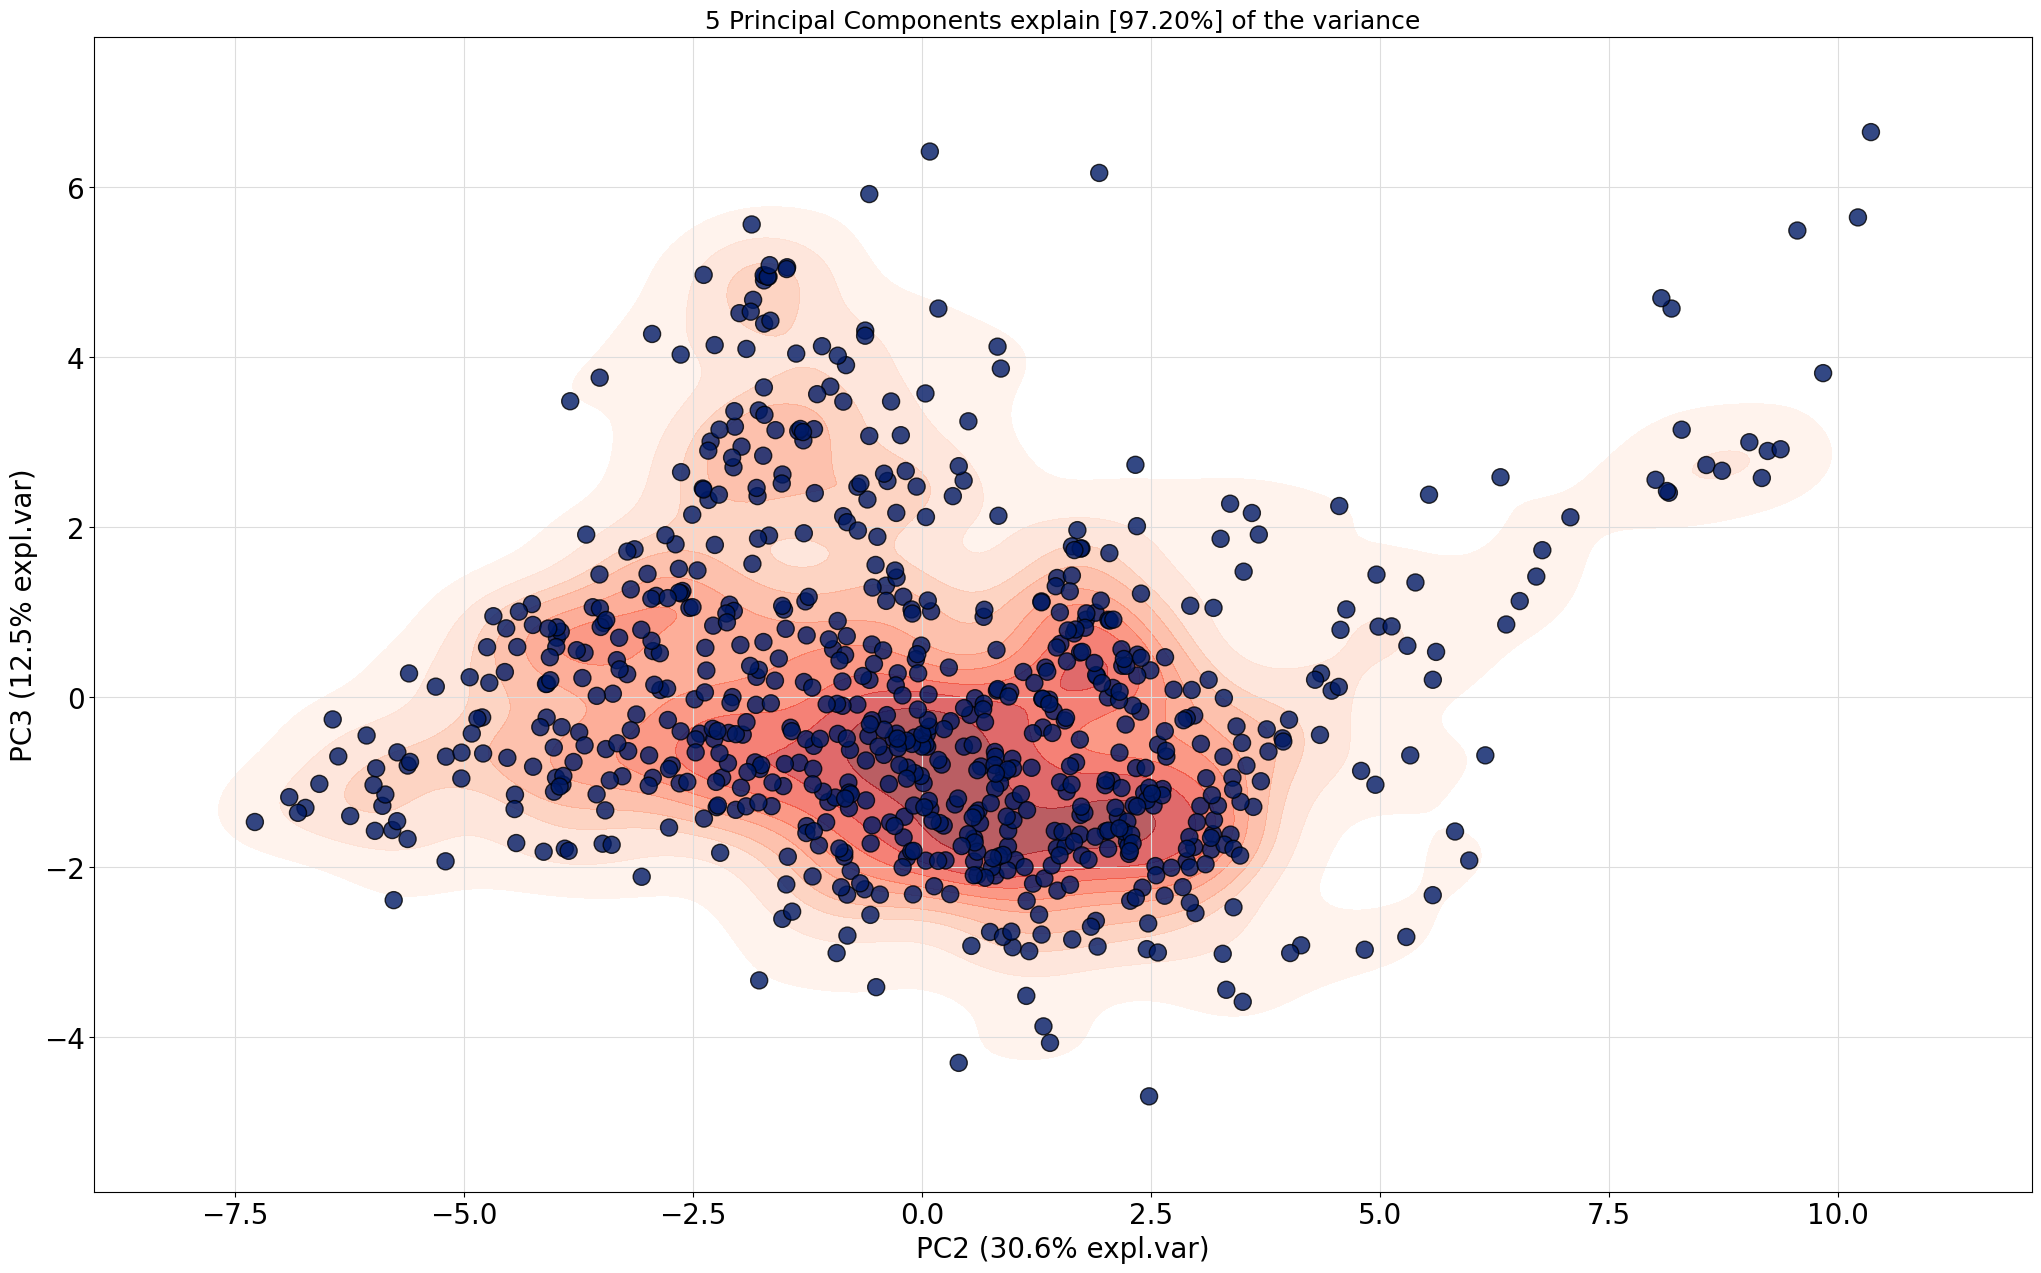

In [43]:
model.scatter(PC=[1, 2], density=True)

[scatterd] >INFO> Add density layer


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [97.20%] of the variance'}, xlabel='PC1 (43.2% expl.var)', ylabel='PC3 (12.5% expl.var)'>)

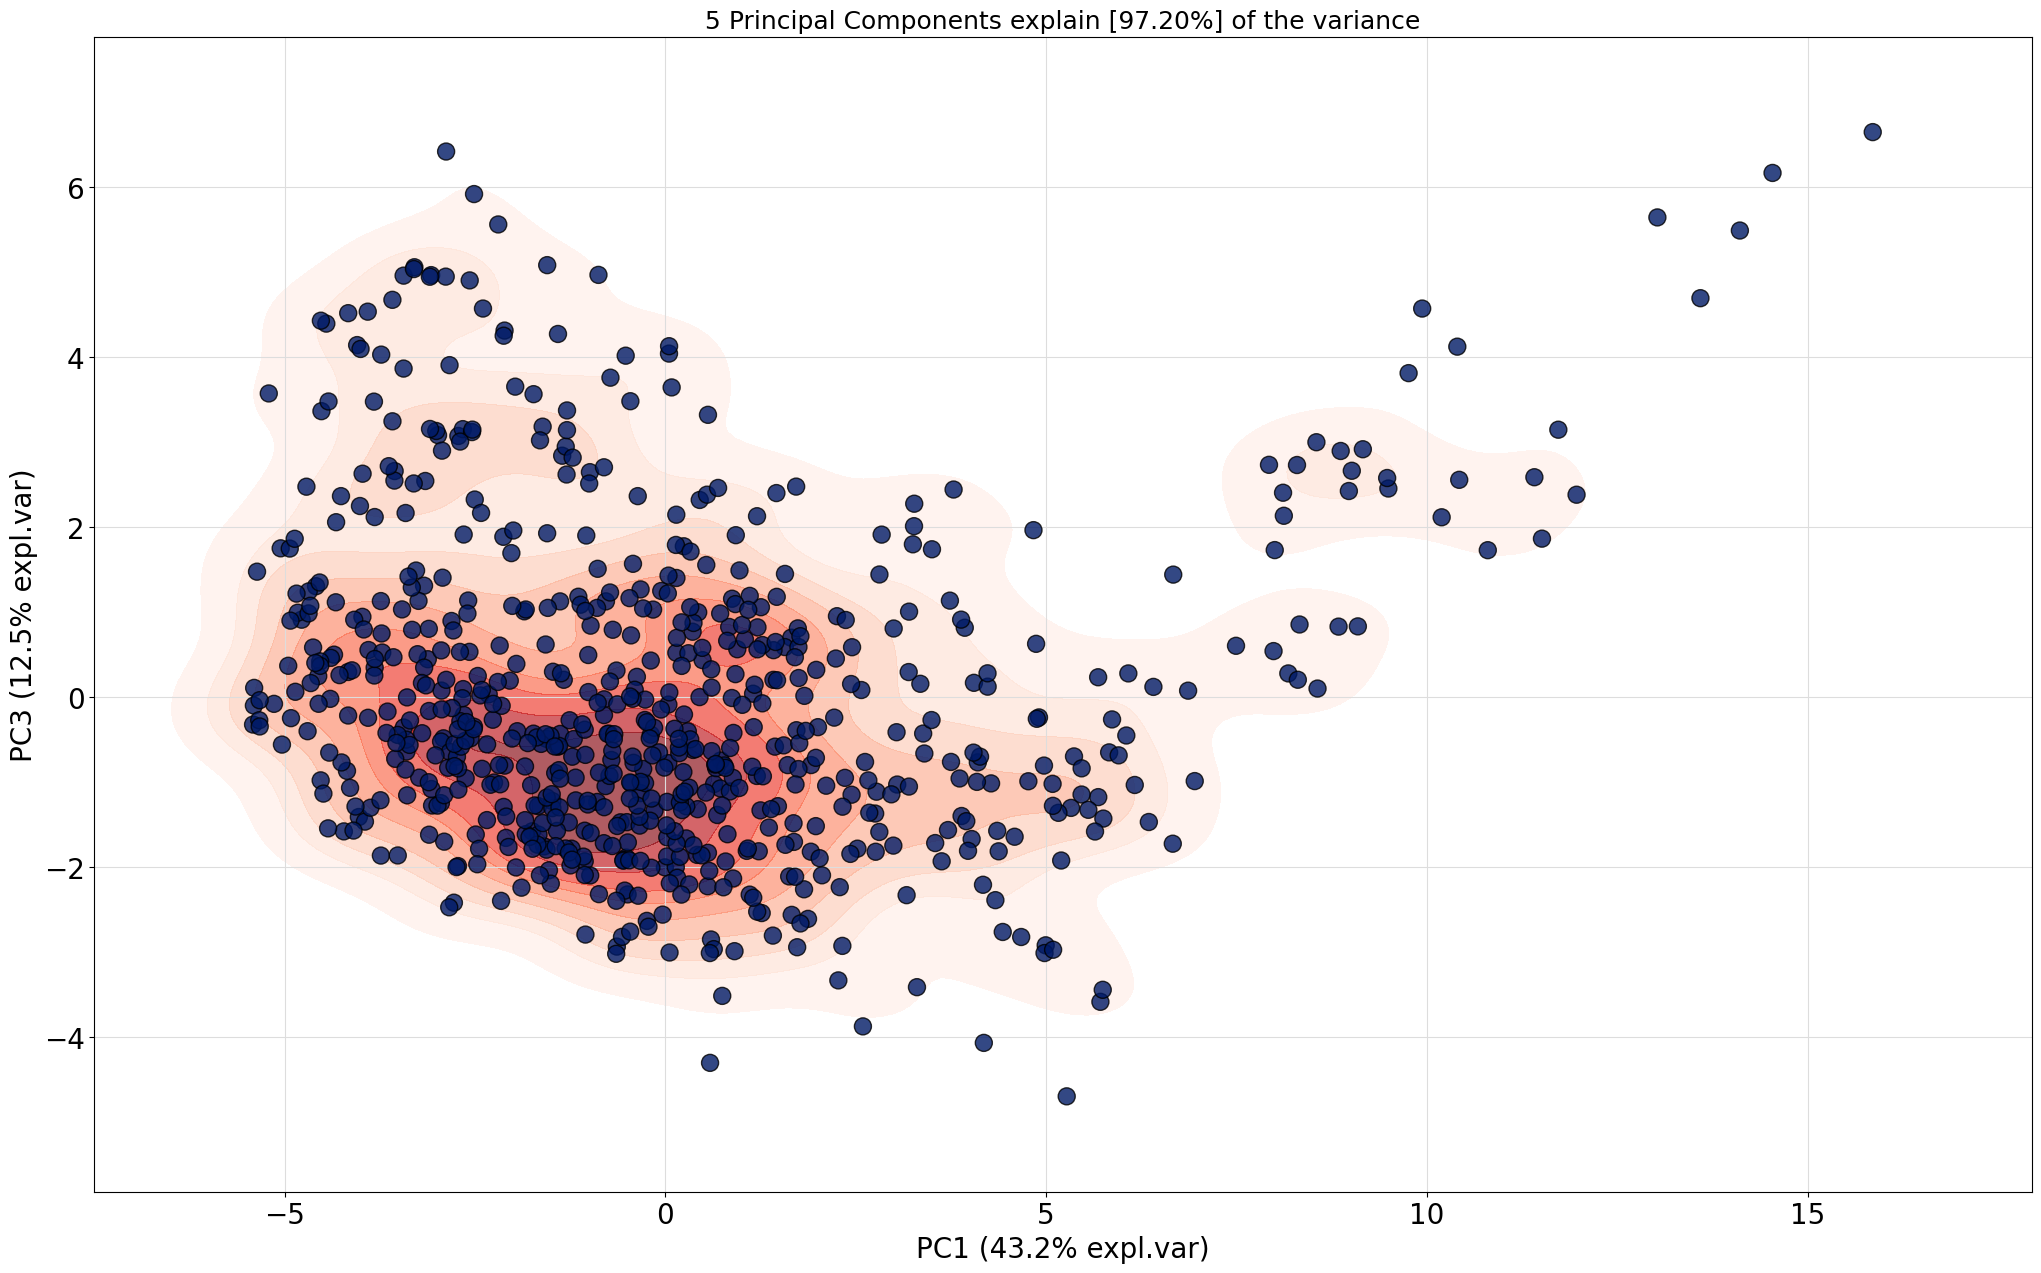

In [44]:
model.scatter(PC=[0, 2], density=True)

PCA citation: https://github.com/erdogant/pca/